In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.width', 55)
import seaborn as sns
import matplotlib.pyplot as plt
df_raw = pd.read_csv(r"/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/xgb_rf_lr/mae.csv")
data = pd.read_csv(r"/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/xgb_rf_lr/mae.csv", index_col=0)
df_dataset_removed = pd.read_csv("/workspaces/ts-hybrid-forecasting-model/univariate/evaluations/xgb_rf_lr/mae.csv").drop(columns="fname", axis = 1)

We scaled the data using min max scaling to enable comparison and to prevent scale of each dataset affect the interpretation.

In [2]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_dataset_removed = pd.DataFrame(scaler.fit_transform(df_dataset_removed), columns=df_dataset_removed.columns)
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

The csv file consist of the performance of machine learning models against sampled univariate time series data from M4 competition (i.e., from each domain, we sampled 50 datasets). MAE was used as an evaluation metrics (performance metrics). 

Basic summary

In [ ]:
df_dataset_removed.describe()


,xgb,rf,lr,xgb_rf_lr
count,250.000000,250.000000,250.000000,250.000000
mean,0.072628,0.048339,0.069192,0.045750
std,0.145964,0.110473,0.133051,0.101788
min,0.000000,0.000000,0.000000,0.000000
25%,0.013432,0.007165,0.013649,0.007150
50%,0.030160,0.016630,0.028130,0.016177
75%,0.052922,0.042154,0.064485,0.038501
max,1.000000,1.000000,1.000000,1.000000


Side-by-side box plot

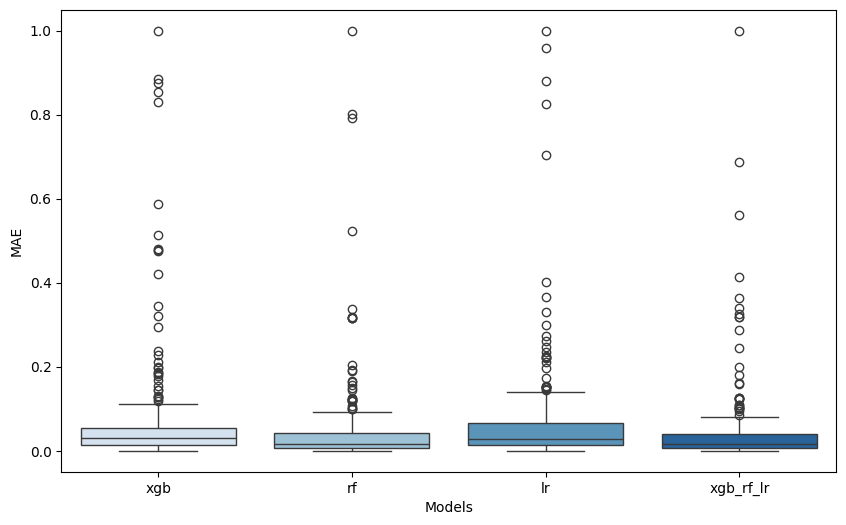

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("MAE")  # Replace with your y-axis label
sns.boxplot(data=df_dataset_removed, palette="Blues")
# Show the plot
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

Side-by-side box plot where outliers are removed using IQR method. 

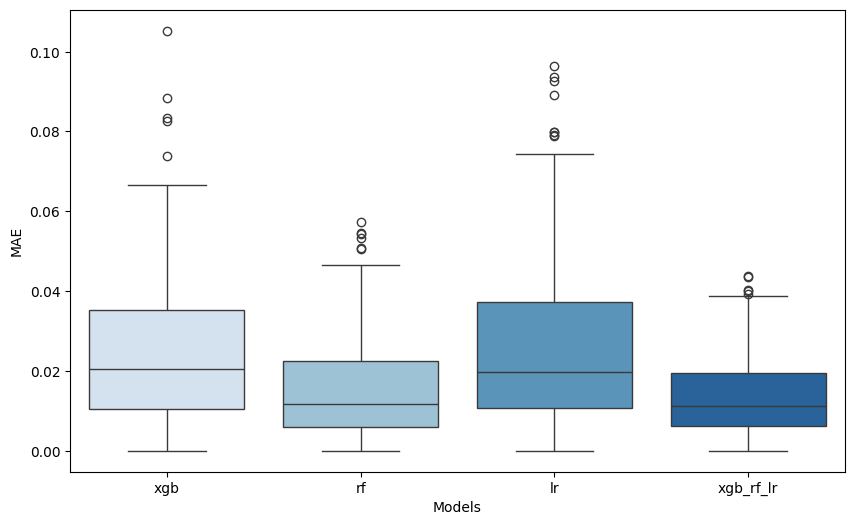

In [5]:
# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(df):
    df = df.copy(deep=True)
    for col in df.select_dtypes(
        include="number"
    ).columns:  # Loop through each numerical column
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        # Define the outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove rows where the value in this column is an outlier
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

    return df


# Assuming df is your original DataFrame
df_clean = remove_outliers_iqr(df_dataset_removed)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, palette="Blues")
plt.xlabel("Models")  # Replace with your x-axis label
plt.ylabel("MAE")  # Replace with your y-axis label

# Show the plot
# plt.title("Side-by-Side Boxplot of Numerical Columns")
plt.show()

average rank of model's performance

In [6]:
# Rank each model's performance (lower MAE = better performance, so rank ascending)
ranked_data = data.rank(axis=1, method='average', ascending=True)
# Calculate the average rank for each model across all datasets
average_ranks = ranked_data.mean(axis=0).sort_values()
# print("Average Ranks for Each Model:\n", average_ranks)
average_ranks

rf           1.698
xgb_rf_lr    1.832
lr           3.182
xgb          3.288
dtype: float64

Bar graph of average rank of model's performance

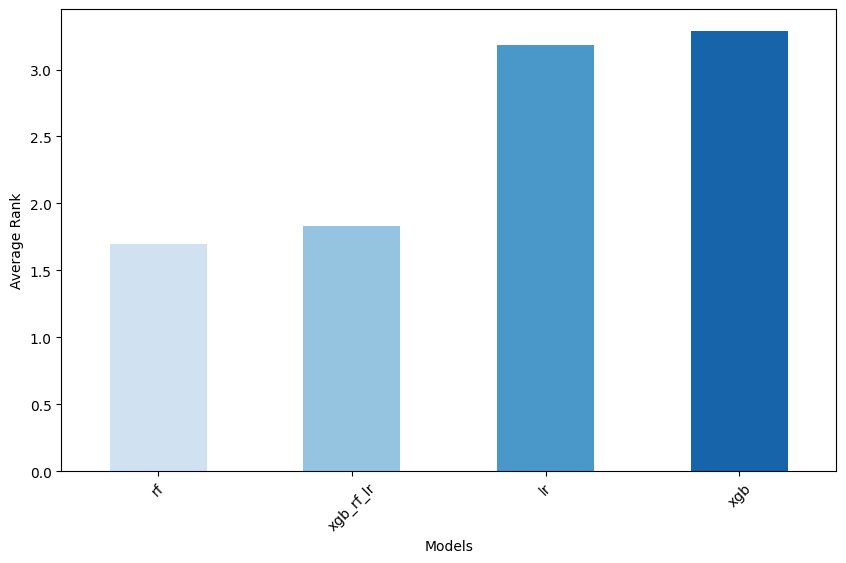

In [ ]:
blue_palette = sns.color_palette("Blues", n_colors=len(average_ranks))

# Plot the bar chart with the blue color palette
average_ranks.plot(kind='bar', figsize=(10, 6), color=blue_palette)

# Add labels and title if needed
plt.ylabel('Average Rank')
plt.xlabel('Models')
plt.xticks(rotation=45)
# plt.title('Average Rank of Models Across Datasets')
plt.show()

Heat map of model ranking per dataset

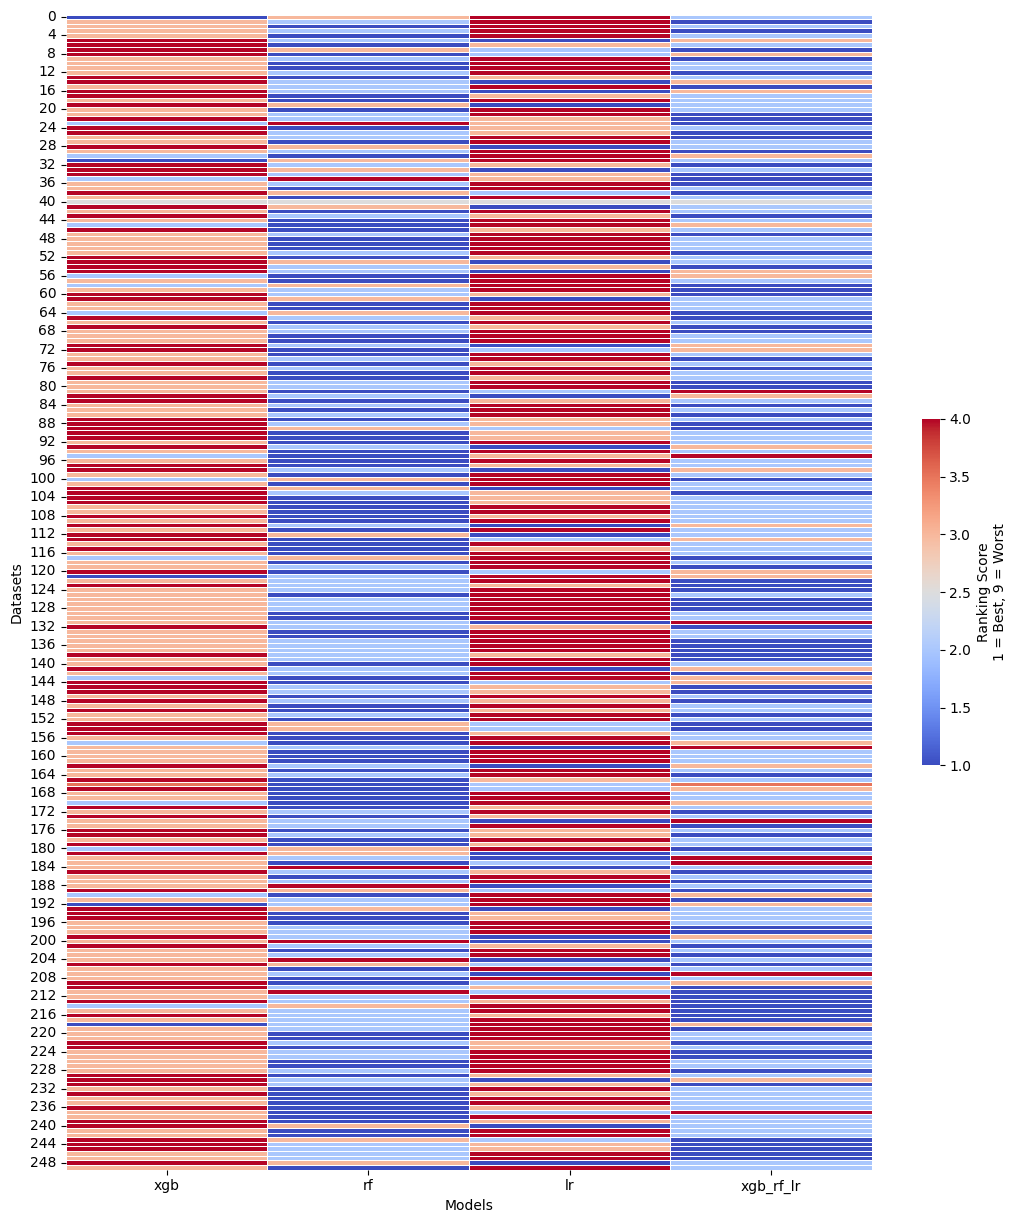

In [ ]:
# # Plot heatmap of ranked models
# plt.figure(figsize=(10, 15))
# sns.heatmap(ranked_data, annot=False, cmap='coolwarm', linewidths=0.5)
# plt.title('Model Rankings per Dataset')
# plt.xlabel('Models')
# plt.ylabel('Datasets')
# plt.show()
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot heatmap of ranked models with a color bar label
# plt.figure(figsize=(10, 15))
# sns.heatmap(ranked_data, annot=False, cmap='coolwarm', linewidths=0.5, 
#             cbar_kws={'label': 'Ranking Score'})  # Add label for the color bar

# # Add labels for the plot
# plt.title('Model Rankings per Dataset')
# plt.xlabel('Models')
# plt.ylabel('Datasets')

# plt.show()

# import matplotlib.pyplot as plt
# import seaborn as sns

# # Plot heatmap of ranked models with a detailed color bar label
# plt.figure(figsize=(10, 15))
# sns.heatmap(ranked_data, annot=False, cmap='coolwarm', linewidths=0.5, 
#             cbar_kws={'label': 'Ranking Score\n1 = Best, 9 = Worst'})  # Descriptive label

# # Add labels for the plot
# plt.title('Model Rankings per Dataset')
# plt.xlabel('Models')
# plt.ylabel('Datasets')

# plt.show()

import matplotlib.pyplot as plt
import seaborn as sns

# Plot heatmap of ranked models with a smaller color bar
plt.figure(figsize=(13, 15))
sns.heatmap(
    ranked_data,
    annot=False,
    cmap='coolwarm',
    linewidths=0.5,
    cbar_kws={'label': 'Ranking Score\n1 = Best, 9 = Worst', 'shrink': 0.3}  # Adjust shrink value
)

# Add labels for the plot
# plt.title('Model Rankings per Dataset')
plt.xlabel('Models')
plt.ylabel('Datasets')

plt.show()



